# RUSH Sportswear

**Samuel Treadway**

8/6/2025

streadway@wisc.edu

I worked on this project as if I were a sales analyst for the fictional company RUSH, a globally renowned sportswear and footwear brand known for its innovative designs and performance-oriented products. The company stores its raw sales data as a collection of three tables:

    TABLE_PRODUCTS
    TABLE_RETAILER
    TABLE_SALES

The data includes the number of units sold, the total sales revenue, the location of the sales, the type of product sold, as well as other relevant information. (For data field definitions and explanations, see the data dictionary.) The data is "raw," meaning it has not been cleaned and probably contains errors that need to be addressed.

The VP of US Sales has tasked me with analyzing sales data for trends and insights that will help company leadership understand the market and identify opportunities for growth.

In addition, she has asked me to answer the following business questions:

    What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?
    What state had the highest sales (in dollars) of women's products in 2021? How much was it?
    What state had the highest sales (in dollars) of men's products in 2021? How much was it?
    What retailer purchased the most units in 2021? In 2020?

She's invited me to take 3-5 minutes to present answers to these questions along with my analysis findings in the next team update meeting.

## Exploratory Data Analysis

**Understand the Problem**

* I need to download three .csv files, named TABLE_PRODUCTS, TABLE_RETAILER and TABLE_SALES and put the data from each into DataFrames.
  * This data is "raw", uncleaned, so data cleaning will be required before I begin analysis.
* I need to analyze the sales data to point out useful trends/insights for company leadership to find growth opportunities.
* I need to answer the questions listed in the business case.
* I need to create a 3-5 minute presentation, with my analysis findings and answers to their questions.

**Acquire and Consolidate Data**

Part 1: Acquire Data

In [ ]:
# install and import needed modules and libraries
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
# upload the TABLE_PRODUCTS_885 .csv
table_products_uploaded = files.upload()

Saving TABLE_PRODUCTS_885.csv to TABLE_PRODUCTS_885.csv


In [ ]:
# put TABLE_PRODUCTS_885.csv into a DataFrame and check
df_table_products = pd.read_csv('/content/TABLE_PRODUCTS_885.csv', sep = '|')
df_table_products.head()

,PRODUCT_ID,PRODUCT_NAME
0,20,Men's Street Footwear
1,30,Men's Athletic Footwear
2,120,Women's Street Footwear
3,130,Women's Athletic Footwear
4,40,Men's Apparel


In [ ]:
# upload the TABLE_RETAILER_885 .csv
table_retailer_uploaded = files.upload()

Saving TABLE_RETAILER_885.csv to TABLE_RETAILER_885.csv


In [ ]:
# put TABLE_RETAILER_885 .csv into a DataFrame and check
df_table_retailer = pd.read_csv('/content/TABLE_RETAILER_885.csv', sep = ',')
df_table_retailer.head()

,RETAILER_ID,RETAILER,REGION,STATE,CITY
0,A00MOHCO,Amazon,Midwest,Ohio,Columbus
1,A00NMAPO,Amazon,Northeast,Maine,Portland
2,A00NMABO,Amazon,Northeast,Massachusetts,Boston
3,A00NNEMA,Amazon,Northeast,New Hampshire,Manchester
4,A00NVEBU,Amazon,Northeast,Vermont,Burlington


In [ ]:
# upload the TABLE_SALES_885 .csv
table_sales_uploaded = files.upload()

Saving TABLE_SALES_885.csv to TABLE_SALES_885.csv


In [ ]:
# put TABLE_SALES_885 .csv into a DataFrame and check
df_table_sales = pd.read_csv('/content/TABLE_SALES_885.csv', sep = ',')
df_table_sales.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.0,1200,0.5,In-store
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.0,1250,0.5,In-store
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.0,1220,0.5,Outlet
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.0,1200,0.5,Outlet
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.0,1220,0.5,Outlet


Part 2: Consolidate Data

I need to consider the keys when consolidating this data.

* TABLE_SALES contains foreign keys for the other two tables.
  * RETAILER_ID is the primary key for TABLE_RETAILER.
  * PRODUCT_ID is the primary key for TABLE_PRODUCTS.

I will merge the DataFrames.

In [ ]:
# pd.merge works with two DataFrames, and I have three that need to be merged
# so two pd.merge calls will be made and this is the first one
# merging df_table_sales and df_table_retailer into temp df_retailer_sales
df_retailer_sales = pd.merge(df_table_sales, df_table_retailer, on = 'RETAILER_ID')
df_retailer_sales.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.0,1200,0.5,In-store,Amazon,Midwest,Ohio,Columbus
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.0,1250,0.5,In-store,Amazon,Midwest,Ohio,Columbus
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.0,1200,0.5,Outlet,Amazon,Midwest,Ohio,Columbus
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus


In [ ]:
# This is the second pd.merge call
# merging df_retailer_sales and df_table_products into df_rush_sales_data
# I should see the columns from each table in df_rush_data with no duplicates
# because I merged on keys
df_rush_sales_data = pd.merge(df_retailer_sales, df_table_products, on = 'PRODUCT_ID')
df_rush_sales_data.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.0,1200,0.5,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.0,1250,0.5,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.0,1200,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear


**Inspect the Data**

I am looking for these common issues:

* Incorrect data formats or data types
  * I am using the RUSH data dictionary PDF as my reference for this part.
* Duplicate, missing, or erroneous values
* Outliers
* Unwanted observations or features

In [ ]:
# Looking for incorrect data formats or data types in df_rush_sales_data
# by using .info(), which shows me the columns and data types
df_rush_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_ID          10270 non-null  int64  
 1   RETAILER_ID       10270 non-null  object 
 2   INVOICE_DATE      10270 non-null  object 
 3   MONTH             10270 non-null  int64  
 4   DAY               10270 non-null  int64  
 5   YEAR              10270 non-null  int64  
 6   PRODUCT_ID        10270 non-null  int64  
 7   PRICE_PER_UNIT    10268 non-null  float64
 8   UNITS_SOLD        10270 non-null  object 
 9   OPERATING_MARGIN  10270 non-null  float64
 10  SALES_METHOD      10270 non-null  object 
 11  RETAILER          10270 non-null  object 
 12  REGION            10270 non-null  object 
 13  STATE             10270 non-null  object 
 14  CITY              10270 non-null  object 
 15  PRODUCT_NAME      10270 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

Incorrect data types to correct in data cleaning:

  * INVOICE_DATE: convert from object to datetime64
  * UNITS_SOLD: convert from object to int16

In [ ]:
# Looking for duplicate entries in df_rush_sales_data
df_rush_sales_data.duplicated().sum()

np.int64(0)

There are no duplicate entries in df_rush_sales_data.

In [ ]:
# Checking number of rows in df_rush_sales_data
len(df_rush_sales_data)

10270

In [ ]:
# Looking for missing values in df_rush_sales_data
df_rush_sales_data.isnull().sum()

,0
ORDER_ID,0
RETAILER_ID,0
INVOICE_DATE,0
MONTH,0
DAY,0
YEAR,0
PRODUCT_ID,0
PRICE_PER_UNIT,2
UNITS_SOLD,0
OPERATING_MARGIN,0


In [ ]:
# Looking for unconventional missing values in df_rush_sales_data
# by looking for non-traditional categorical data
# This is also a good way to check for erroneous data

# List of categorical variables in df_rush_sales_data
cat_var = list(df_rush_sales_data.select_dtypes(include = 'object').columns)

# View the unique values for each categorical variable
for column in cat_var:
  print(column)
  print(df_rush_sales_data[column].unique())

RETAILER_ID
['A00MOHCO' 'A00NMAPO' 'A00NMABO' 'A00NNEMA' 'A00NVEBU' 'A00SALBI'
 'A00SKELO' 'A00SNOCH' 'A00WALAN' 'F00SLONE' 'F00SGEAT' 'F00SVIRI'
 'F00WALAN' 'F00WARPH' 'F00WHAHO' 'F00MNEOM' 'F00WIDBO' 'F00WWYCH'
 'F00MILCH' 'F00MIODE' 'F00MKAWI' 'F00MMIDE' 'F00MMIMI' 'F00MMIST'
 'F00MNOFA' 'F00MSOSI' 'F00NCOHA' 'F00NDEWI' 'F00NMABA' 'F00NNEMA'
 'F00SFLMI' 'F00NNENE' 'F00NPEPH' 'F00SKELO' 'F00NRHPR' 'F00SSOCH'
 'F00NWECH' 'F00SMIJA' 'F00STEKN' 'F00STEDA' 'F00WCALO' 'F00WWASE'
 'K00WARPH' 'K00WNEAL' 'K00NDEWI' 'K00NNENE' 'K00NNEAL' 'K00WWYCH'
 'K00MMIMI' 'K00MMOBI' 'K00WCALO' 'K00WCASA' 'K00MKAWI' 'K00SOKOK'
 'S00MILCH' 'S00SFLOR' 'S00SGEAT' 'S00MMOBI' 'S00SVIRI' 'S00MNEOM'
 'S00WHAHO' 'S00WNEAL' 'S00MMIDE' 'S00MNOFA' 'S00MSOSI' 'S00NCOHA'
 'S00NMABA' 'S00NNENE' 'S00NMABO' 'S00NRHPR' 'S00SMIJA' 'S00SFLMI'
 'S00SNOCH' 'S00SSOCH' 'S00SALBI' 'S00STEKN' 'S00STEDA' 'S00STEHO'
 'S00WIDBO' 'W00SFLOR' 'W00WHAHO' 'W00NNENE' 'W00SMIJA' 'W00SARLI'
 'W00STEHO' 'W00NMAPO' 'W00NPEPH' 'W00SLONE' 'W00W

In [ ]:
# Checking for non-traditional missing numerical data
# and erroneous values in df_rush_sales_data
df_rush_sales_data.describe()

,ORDER_ID,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,OPERATING_MARGIN
count,10270.000000,10270.000000,10270.000000,10270.000000,10270.000000,10268.000000,10270.000000
mean,4970.270886,6.456280,14.619474,2020.873223,80.007790,54.574795,0.426381
std,2770.631835,3.461991,7.301120,0.332739,50.670448,986.521962,0.096023
min,1.000000,1.000000,1.000000,2020.000000,20.000000,7.000000,0.100000
25%,2568.250000,3.000000,9.000000,2021.000000,30.000000,35.000000,0.350000
50%,5135.500000,6.000000,14.000000,2021.000000,120.000000,45.000000,0.420000
75%,7235.750000,9.000000,20.000000,2021.000000,130.000000,55.000000,0.500000
max,9648.000000,12.000000,31.000000,2021.000000,140.000000,99999.000000,0.800000


In [ ]:
# Checking value count for erroneous data
# List of categorical variables in df_rush_sales_data
cat_var = list(df_rush_sales_data.select_dtypes(include = 'object').columns)

# View the unique values for each categorical variable
for column in cat_var:
  print(column)
  print(df_rush_sales_data[column].value_counts())

RETAILER_ID
RETAILER_ID
W00SARLI    432
W00SFLOR    378
W00STEHO    324
W00WNELA    216
W00WORPO    216
           ... 
S00MMOBI      8
S00MNEOM      8
K00MMIMI      8
W00NMAPO      8
W00MOHCO      8
Name: count, Length: 106, dtype: int64
INVOICE_DATE
INVOICE_DATE
1/17/2021     88
11/17/2021    83
12/16/2021    81
1/10/2021     80
4/17/2021     79
              ..
12/7/2020      2
3/1/2021       2
12/19/2020     2
12/13/2020     2
3/7/2021       2
Name: count, Length: 724, dtype: int64
UNITS_SOLD
UNITS_SOLD
150    210
225    209
175    192
300    189
200    175
      ... 
318      1
286      1
347      1
352      1
355      1
Name: count, Length: 362, dtype: int64
SALES_METHOD
SALES_METHOD
Online      5417
Outlet      3093
In-store    1740
Ootlet        20
Name: count, dtype: int64
RETAILER
RETAILER
West Gear        2823
Foot Locker      2637
Sports Direct    2088
Kohl's           1030
Amazon            949
Walmart           743
Name: count, dtype: int64
REGION
REGION
West         2448

* There are two missing values in the PRICE_PER_UNIT column out of 10,270 rows.
* Misspelled SALES_METHOD value 'Ootlet' needs to be changed to 'Outlet'. There are 20 'Ootlet' entries.
* '***' value in UNITS_SOLD, an unconventional null value
* The max PRICE_PER_UNIT is 99999. Within the context of RUSH selling sportswear, I strongly doubt they have an item priced at $99,999 per unit. I consider this an unconventional null value.


These need to be dealt with in data cleaning.

In [ ]:
# Looking for outliers in df_rush_sales_data
# I am using the IQR (interquartile range) method
# Function to calculate IQR and print rows
# with values that fall outside the defined IQR
def count_iqr_outliers(df, column):
  # define q1
  q1 = df[column].quantile(0.25)
  # define q3
  q3 = df[column].quantile(0.75)
  # define IQR
  iqr = q3 - q1
  # define the outlier thresholds
  lower_threshold = q1 - 1.5 * iqr
  upper_threshold = q3 + 1.5 * iqr
  # count the outliers
  outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
  # count the true values (the outliers)
  return outliers.sum()

In [ ]:
# Iterate over numerical columns in the DataFrame
num_var = list(df_rush_sales_data.select_dtypes(include = ['int64', 'float64']).columns)

for column in num_var:
  print(f'{column} : {count_iqr_outliers(df_rush_sales_data, column)}')

ORDER_ID : ORDER_ID              0
RETAILER_ID           0
INVOICE_DATE          0
MONTH                 0
DAY                   0
YEAR                  0
PRODUCT_ID            0
PRICE_PER_UNIT      0.0
UNITS_SOLD            0
OPERATING_MARGIN    0.0
SALES_METHOD          0
RETAILER              0
REGION                0
STATE                 0
CITY                  0
PRODUCT_NAME          0
dtype: object
MONTH : ORDER_ID              0
RETAILER_ID           0
INVOICE_DATE          0
MONTH                 0
DAY                   0
YEAR                  0
PRODUCT_ID            0
PRICE_PER_UNIT      0.0
UNITS_SOLD            0
OPERATING_MARGIN    0.0
SALES_METHOD          0
RETAILER              0
REGION                0
STATE                 0
CITY                  0
PRODUCT_NAME          0
dtype: object
DAY : ORDER_ID              0
RETAILER_ID           0
INVOICE_DATE          0
MONTH                 0
DAY                   0
YEAR                  0
PRODUCT_ID            0
PRICE_PER_U

**Cleaning the Data**

Data cleaning to-dos:

* Convert the following columns to the correct data type:
  * INVOICE_DATE: convert from object to datetime64
  * UNITS_SOLD: convert from object to int16
* Deal with '***' value in UNITS_SOLD
* Handle the two missing values in the PRICE_PER_UNIT column.
* Misspelled SALES_METHOD value 'Ootlet' needs to be changed to 'Outlet'. There are 20 'Ootlet' entries.
* The max PRICE_PER_UNIT is 99999. Within the context of RUSH selling sportswear, I strongly doubt they have an item priced at $99,999 per unit. I consider this an unconventional null value.




In [ ]:
# Convert INVOICE_DATE from object to datetime64
df_rush_sales_data['INVOICE_DATE'] = pd.to_datetime(df_rush_sales_data['INVOICE_DATE'])

In [ ]:
# Replace '***' value in UNITS_SOLD
df_rush_sales_data['UNITS_SOLD'] = df_rush_sales_data['UNITS_SOLD'].replace('***', 0)

In [ ]:
# Convert UNITS_SOLD from object to int16
df_rush_sales_data['UNITS_SOLD'] = pd.to_numeric(df_rush_sales_data['UNITS_SOLD'], downcast = 'integer', errors = 'coerce')

# Check the datatypes for df_rush_sales_data
df_rush_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER_ID          10270 non-null  int64         
 1   RETAILER_ID       10270 non-null  object        
 2   INVOICE_DATE      10270 non-null  datetime64[ns]
 3   MONTH             10270 non-null  int64         
 4   DAY               10270 non-null  int64         
 5   YEAR              10270 non-null  int64         
 6   PRODUCT_ID        10270 non-null  int64         
 7   PRICE_PER_UNIT    10268 non-null  float64       
 8   UNITS_SOLD        10270 non-null  int16         
 9   OPERATING_MARGIN  10270 non-null  float64       
 10  SALES_METHOD      10270 non-null  object        
 11  RETAILER          10270 non-null  object        
 12  REGION            10270 non-null  object        
 13  STATE             10270 non-null  object        
 14  CITY              1027

In [ ]:
# Look at the rows with missing values in PRICE_PER_UNIT
df_rush_sales_data[df_rush_sales_data['PRICE_PER_UNIT'].isnull()]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
98,591,A00NVEBU,2020-04-02,4,2,2020,20,NaN,525,0.35,In-store,Amazon,Northeast,Vermont,Burlington,Men's Street Footwear
99,597,A00NVEBU,2020-04-08,4,8,2020,20,NaN,525,0.50,In-store,Amazon,Northeast,Vermont,Burlington,Men's Street Footwear


These orders each have 525 units sold. At first glance, this seems like a lot, but I don't know the range of units sold in these orders. I need to look a little deeper into the data.

In [ ]:
# Get the range of UNITS_SOLD
df_rush_sales_data['UNITS_SOLD'].describe()

,UNITS_SOLD
count,10270.000000
mean,246.585200
std,211.898106
min,0.000000
25%,100.000000
50%,173.000000
75%,325.000000
max,1275.000000


525 units sold in an order is a lot. It's above our 75th percentile value of 325 units sold.

In [ ]:
# Update 'Ootlet' SALES_METHOD entries with 'Outlet'
df_rush_sales_data['SALES_METHOD'] = df_rush_sales_data['SALES_METHOD'].replace('Ootlet', 'Outlet')

# Display the unique values in SALES_METHOD
# 'Ootlet' should not appear
df_rush_sales_data['SALES_METHOD'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [ ]:
# Let's look at the row with a PRICE_PER_UNIT of 99999
df_rush_sales_data[df_rush_sales_data['PRICE_PER_UNIT'] == 99999]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
423,2536,F00NNEMA,2021-05-23,5,23,2021,20,99999.0,520,0.4,Online,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear


So, the rows with null PRICE_PER_UNIT values had to have had a PRICE_PER_UNIT to be sold. Imputing 0 does not make sense here.

I will impute the mean of the PRICE_PER_UNIT for Men's Street Footwear in the rows with null PRICE_PER_UNIT entries.

First, I need to make sure these PRICE_PER_UNIT values are listed as NaN. This will make imputing simpler.

In [ ]:
# Impute NaN for rows with PRICE_PER_UNIT value of 99999
df_rush_sales_data.loc[df_rush_sales_data['PRICE_PER_UNIT'] == 99999, 'PRICE_PER_UNIT'] = float('nan')

# Look at rows with PRICE_PER_UNIT value of NaN
# I should see rows with ORDER_ID 591, 597 and 2536 here
df_rush_sales_data[df_rush_sales_data['PRICE_PER_UNIT'].isnull()]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
98,591,A00NVEBU,2020-04-02,4,2,2020,20,NaN,525,0.35,In-store,Amazon,Northeast,Vermont,Burlington,Men's Street Footwear
99,597,A00NVEBU,2020-04-08,4,8,2020,20,NaN,525,0.50,In-store,Amazon,Northeast,Vermont,Burlington,Men's Street Footwear
423,2536,F00NNEMA,2021-05-23,5,23,2021,20,NaN,520,0.40,Online,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear


In [ ]:
# Impute the mean PRICE_PER_UNIT of Men's Street Footwear
# for rows with PRICE_PER_UNIT value of NaN
df_rush_sales_data['PRICE_PER_UNIT'] = df_rush_sales_data['PRICE_PER_UNIT'].fillna(df_rush_sales_data[df_rush_sales_data['PRODUCT_ID'] == 20]['PRICE_PER_UNIT'].mean())

# Look for rows with PRICE_PER_UNIT null value
# I should not see any rows displayed
df_rush_sales_data[df_rush_sales_data['PRICE_PER_UNIT'].isnull()]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME


**Data Analysis**

Objectives for Data Analysis:

Answer the following business questions:
  *  What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?
  * What state had the highest sales (in dollars) of women's products in 2021? How much was it?
  * What state had the highest sales (in dollars) of men's products in 2021? How much was it?
  * What retailer purchased the most units in 2021? In 2020?

Analyze sales data for trends and insights that will help company leadership understand the market and identify opportunities for growth.

Consider looking for trends or insights in:
* Seasonality
* Retailers
* Locations
* Sales methods

What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?

In [ ]:
# Preparing data for analysis
# What product category (product) had the highest sales (in dollars) in 2021?

# Create df_orders_2021 DataFrame by selecting orders with invoice year of 2021
# and check the first 10 results
df_orders_2021 = df_rush_sales_data[df_rush_sales_data['INVOICE_DATE'].dt.year == 2021]
df_orders_2021.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
28,171,A00NMAPO,2021-01-06,1,6,2021,20,60.0,975,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
29,177,A00NMAPO,2021-01-12,1,12,2021,20,60.0,1025,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
30,183,A00NMAPO,2021-01-18,1,18,2021,20,65.0,975,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
31,189,A00NMAPO,2021-01-24,1,24,2021,20,55.0,925,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
32,195,A00NMAPO,2021-01-30,1,30,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
33,201,A00NMAPO,2021-02-05,2,5,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
34,207,A00NMAPO,2021-02-11,2,11,2021,20,55.0,975,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
35,213,A00NMAPO,2021-02-17,2,17,2021,20,35.0,700,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
36,219,A00NMAPO,2021-03-13,3,13,2021,20,35.0,750,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear
37,225,A00NMAPO,2021-03-19,3,19,2021,20,35.0,800,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear


In [ ]:
# Within the newly created df_orders_2021 DataFrame, create a new column called SALE_REVENUE,
# fill each row by multiplying PRICE_PER_UNIT and UNITS_SOLD, and check the first 10 results
df_orders_2021['SALE_REVENUE'] = df_orders_2021['PRICE_PER_UNIT'] * df_orders_2021['UNITS_SOLD']
df_orders_2021.head(10)

/tmp/ipython-input-3376420930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_2021['SALE_REVENUE'] = df_orders_2021['PRICE_PER_UNIT'] * df_orders_2021['UNITS_SOLD']


,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,SALE_REVENUE
28,171,A00NMAPO,2021-01-06,1,6,2021,20,60.0,975,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,58500.0
29,177,A00NMAPO,2021-01-12,1,12,2021,20,60.0,1025,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,61500.0
30,183,A00NMAPO,2021-01-18,1,18,2021,20,65.0,975,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,63375.0
31,189,A00NMAPO,2021-01-24,1,24,2021,20,55.0,925,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,50875.0
32,195,A00NMAPO,2021-01-30,1,30,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,48125.0
33,201,A00NMAPO,2021-02-05,2,5,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,48125.0
34,207,A00NMAPO,2021-02-11,2,11,2021,20,55.0,975,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,53625.0
35,213,A00NMAPO,2021-02-17,2,17,2021,20,35.0,700,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,24500.0
36,219,A00NMAPO,2021-03-13,3,13,2021,20,35.0,750,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,26250.0
37,225,A00NMAPO,2021-03-19,3,19,2021,20,35.0,800,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,28000.0


In [ ]:
# What product category (product) had the highest sales (in dollars) in 2021?
df_orders_2021.groupby('PRODUCT_NAME')['SALE_REVENUE'].sum().sort_values(ascending = False).round(2)

,SALE_REVENUE
PRODUCT_NAME,
Men's Street Footwear,23280215.61
Women's Apparel,19658904.00
Men's Athletic Footwear,16702706.00
Women's Street Footwear,13807909.00
Men's Apparel,13325861.00
Women's Athletic Footwear,11381041.00


The Men's Street Footwear product category had the highest sales in dollars in 2021, at $23,280,215.61.

In [ ]:
# How many units of Men's Street Footwear were sold in 2021?
df_orders_2021.groupby('PRODUCT_NAME')['UNITS_SOLD'].sum().sort_values(ascending = False)

,UNITS_SOLD
PRODUCT_NAME,
Men's Street Footwear,508821
Women's Apparel,363672
Men's Athletic Footwear,362778
Women's Street Footwear,324294
Women's Athletic Footwear,258860
Men's Apparel,251656


508,821 units of Men's Street Footwear were sold in 2021.

What state had the highest sales (in dollars) of women's products in 2021? How much was it?

In [ ]:
# From the df_orders_2021 DataFrame, I will create a df_womens_orders_2021 DataFrame
# that contains all sales of women's products
# and I will check the first ten rows of this new DataFrame
df_womens_orders_2021 = df_orders_2021[df_orders_2021['PRODUCT_NAME'].str.contains('Women')]
df_womens_orders_2021.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,SALE_REVENUE
5161,167,A00NMAPO,2021-01-02,1,2,2021,120,65.0,750,0.40,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,48750.0
5162,173,A00NMAPO,2021-01-08,1,8,2021,120,65.0,825,0.40,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,53625.0
5163,179,A00NMAPO,2021-01-14,1,14,2021,120,65.0,825,0.35,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,53625.0
5164,185,A00NMAPO,2021-01-20,1,20,2021,120,65.0,800,0.35,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,52000.0
5165,191,A00NMAPO,2021-01-26,1,26,2021,120,55.0,775,0.30,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,42625.0
5166,197,A00NMAPO,2021-02-01,2,1,2021,120,55.0,700,0.30,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,38500.0
5167,203,A00NMAPO,2021-02-07,2,7,2021,120,55.0,725,0.30,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,39875.0
5168,209,A00NMAPO,2021-02-13,2,13,2021,120,55.0,775,0.30,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,42625.0
5169,215,A00NMAPO,2021-03-09,3,9,2021,120,45.0,700,0.40,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,31500.0
5170,221,A00NMAPO,2021-03-15,3,15,2021,120,45.0,675,0.40,Outlet,Amazon,Northeast,Maine,Portland,Women's Street Footwear,30375.0


In [ ]:
# Which state had the highest sales of women's products in 2021?
# How much was it?
df_womens_orders_2021.groupby('STATE')['SALE_REVENUE'].sum().sort_values(ascending = False).round(2)

,SALE_REVENUE
STATE,
Maine,2176301.0
Delaware,2023575.0
New Hampshire,1916400.0
Arizona,1798900.0
Missouri,1771992.0
Illinois,1743277.0
New York,1736862.0
Virginia,1719886.0
Nebraska,1712680.0


Maine had the highest sales of women's products in 2021, totaling $2,176,301.

What state had the highest sales (in dollars) of men's products in 2021? How much was it?

In [ ]:
# Similar to how I created df_womens_orders_2021,
# I will create df_mens_orders_2021 and check the first ten rows
df_mens_orders_2021 = df_orders_2021[df_orders_2021['PRODUCT_NAME'].str.contains('Men')]
df_mens_orders_2021.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,SALE_REVENUE
28,171,A00NMAPO,2021-01-06,1,6,2021,20,60.0,975,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,58500.0
29,177,A00NMAPO,2021-01-12,1,12,2021,20,60.0,1025,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,61500.0
30,183,A00NMAPO,2021-01-18,1,18,2021,20,65.0,975,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,63375.0
31,189,A00NMAPO,2021-01-24,1,24,2021,20,55.0,925,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,50875.0
32,195,A00NMAPO,2021-01-30,1,30,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,48125.0
33,201,A00NMAPO,2021-02-05,2,5,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,48125.0
34,207,A00NMAPO,2021-02-11,2,11,2021,20,55.0,975,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,53625.0
35,213,A00NMAPO,2021-02-17,2,17,2021,20,35.0,700,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,24500.0
36,219,A00NMAPO,2021-03-13,3,13,2021,20,35.0,750,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,26250.0
37,225,A00NMAPO,2021-03-19,3,19,2021,20,35.0,800,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,28000.0


In [ ]:
# Which state had the highest sales of men's products in 2021?
# How much was it?
df_mens_orders_2021.groupby('STATE')['SALE_REVENUE'].sum().sort_values(ascending = False).round(2)

,SALE_REVENUE
STATE,
Delaware,2334300.00
Arizona,2261025.00
New Hampshire,2231459.61
Maine,2217190.00
New York,2114999.00
Illinois,2093438.00
Missouri,1951530.00
Connecticut,1926568.00
Nebraska,1718726.00


Delaware had the highest sales of men's products in 2021, totaling $2,334,300.

What retailer purchased the most units in 2021?

In [ ]:
# Answering the question for 2021 first
# I am referencing df_orders_2021 for this

# What retailer purchased the most units in 2021?
df_orders_2021.groupby('RETAILER')['UNITS_SOLD'].sum().sort_values(ascending = False)

,UNITS_SOLD
RETAILER,
Foot Locker,1097410
West Gear,315502
Sports Direct,256363
Amazon,205570
Kohl's,136950
Walmart,58286


Foot Locker purchased the most units in 2021, purchasing 1,097,410 units for the year.

What retailer purchased the most units in 2020?

In [ ]:
# Now I need to create a df_orders_2020 DataFrame
# and check the first ten rows
df_orders_2020 = df_rush_sales_data[df_rush_sales_data['INVOICE_DATE'].dt.year == 2020]
df_orders_2020.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
0,1,A00MOHCO,2020-01-01,1,1,2020,20,50.0,1200,0.5,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
1,7,A00MOHCO,2020-01-07,1,7,2020,20,50.0,1250,0.5,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
2,13,A00MOHCO,2020-01-25,1,25,2020,20,50.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
3,19,A00MOHCO,2020-01-31,1,31,2020,20,50.0,1200,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
4,25,A00MOHCO,2020-02-06,2,6,2020,20,60.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
5,31,A00MOHCO,2020-03-04,3,4,2020,20,60.0,1250,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
6,37,A00MOHCO,2020-03-10,3,10,2020,20,60.0,1275,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
7,43,A00MOHCO,2020-03-16,3,16,2020,20,60.0,1250,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
8,49,A00MOHCO,2020-04-19,4,19,2020,20,60.0,1200,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
9,57,A00MOHCO,2020-04-27,4,27,2020,20,65.0,1150,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear


In [ ]:
# What retailer purchased the most units in 2020?
df_orders_2020.groupby('RETAILER')['UNITS_SOLD'].sum().sort_values(ascending = False)

,UNITS_SOLD
RETAILER,
Amazon,317930
Kohl's,68686
West Gear,57334
Sports Direct,18399


Amazon purchased the most units in 2020, purchasing 317,930 units for the year.

Looking for trends and insights:

* In 2021, Delaware had the highest sales of men's products and the second highest sales of women's products. I want to dig deeper into this.
  * What was the SALES_REVENUE by month? Are there seasons or months where purchasing notably increased or decreased?
* Men's Street Footwear was the product category that both had the highest sales revenue and most units sold in 2021.
  * Where were the buyers?
* As we know, 2020 was a very unusual year. Amazon purchased the most units of any retailer by far that year. What was their purchasing pattern? Did it diverge from conventional wisdom?

In [ ]:
# Create df_delaware_2021 DataFrame and check the first ten rows
df_delaware_2021 = df_orders_2021[df_orders_2021['STATE'] == 'Delaware']
df_delaware_2021.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,SALE_REVENUE
392,2350,F00NDEWI,2021-10-07,10,7,2021,20,55.0,975,0.45,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,53625.0
393,2356,F00NDEWI,2021-11-06,11,6,2021,20,55.0,925,0.45,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,50875.0
394,2362,F00NDEWI,2021-12-05,12,5,2021,20,70.0,1075,0.45,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,75250.0
395,2368,F00NDEWI,2021-01-06,1,6,2021,20,35.0,925,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,32375.0
396,2374,F00NDEWI,2021-02-04,2,4,2021,20,35.0,975,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,34125.0
397,2380,F00NDEWI,2021-03-02,3,2,2021,20,30.0,920,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,27600.0
398,2386,F00NDEWI,2021-04-03,4,3,2021,20,30.0,875,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,26250.0
399,2392,F00NDEWI,2021-05-02,5,2,2021,20,45.0,945,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,42525.0
400,2398,F00NDEWI,2021-06-04,6,4,2021,20,50.0,950,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,47500.0
401,2404,F00NDEWI,2021-07-02,7,2,2021,20,65.0,1050,0.40,Online,Foot Locker,Northeast,Delaware,Wilmington,Men's Street Footwear,68250.0


In [ ]:
# What was the SALES_REVENUE by month?
df_delaware_2021.groupby(df_delaware_2021['INVOICE_DATE'].dt.month)['SALE_REVENUE'].sum().round(2)

,SALE_REVENUE
INVOICE_DATE,
1,335500.0
2,235375.0
3,197725.0
4,199375.0
5,327200.0
6,406125.0
7,411000.0
8,270125.0
9,344125.0


The month with the highest sales revenue, by far, is December. November has the second highest sales revenue. These make sense, considering the holiday season.

March and April have the lowest sales revenues for any month in 2021. This is something that might merit a deeper look to figure out why.

Anyway, I want to make a line chart for my presentation, to visually display this information.

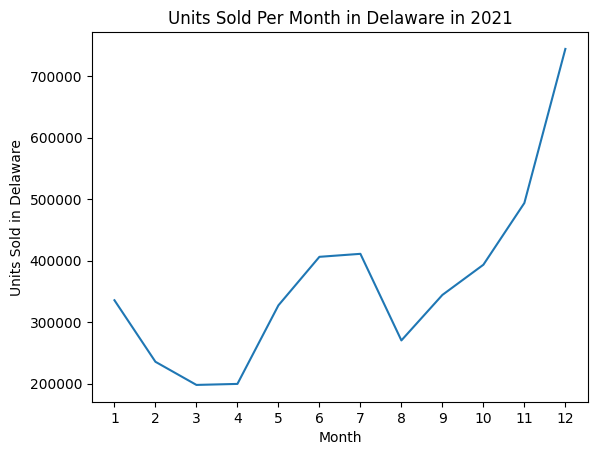

In [ ]:
# Creating a line chart to show Delaware sales revenue by month
x = df_delaware_2021.groupby(df_delaware_2021['INVOICE_DATE'].dt.month)['SALE_REVENUE'].sum().index
y = df_delaware_2021.groupby(df_delaware_2021['INVOICE_DATE'].dt.month)['SALE_REVENUE'].sum().values

plt.plot(x, y)
# Updating x-axis label and making sure all 12 months display on the x-axis
plt.xlabel('Month')
plt.xticks(np.arange(min(x), max(x) + 1, 1))
# Updating y-axis label
plt.ylabel('Units Sold in Delaware')
# Updating chart title
plt.title('Units Sold Per Month in Delaware in 2021')
plt.show()

Men's Street Footwear was the product category that both had the highest sales revenue and most units sold in 2021. Where were the buyers?

In [ ]:
# create df_mens_street_footwear_2021 DataFrame
df_mens_street_footwear_2021 = df_orders_2021[df_orders_2021['PRODUCT_NAME'] == 'Men\'s Street Footwear']
df_mens_street_footwear_2021.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,SALE_REVENUE
28,171,A00NMAPO,2021-01-06,1,6,2021,20,60.0,975,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,58500.0
29,177,A00NMAPO,2021-01-12,1,12,2021,20,60.0,1025,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,61500.0
30,183,A00NMAPO,2021-01-18,1,18,2021,20,65.0,975,0.35,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,63375.0
31,189,A00NMAPO,2021-01-24,1,24,2021,20,55.0,925,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,50875.0
32,195,A00NMAPO,2021-01-30,1,30,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,48125.0
33,201,A00NMAPO,2021-02-05,2,5,2021,20,55.0,875,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,48125.0
34,207,A00NMAPO,2021-02-11,2,11,2021,20,55.0,975,0.30,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,53625.0
35,213,A00NMAPO,2021-02-17,2,17,2021,20,35.0,700,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,24500.0
36,219,A00NMAPO,2021-03-13,3,13,2021,20,35.0,750,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,26250.0
37,225,A00NMAPO,2021-03-19,3,19,2021,20,35.0,800,0.40,Outlet,Amazon,Northeast,Maine,Portland,Men's Street Footwear,28000.0


In [ ]:
# First, let's get the SALE_REVENUE from df_mens_street_footwear_2021 by region
df_mens_street_footwear_2021.groupby('REGION')['SALE_REVENUE'].sum().sort_values(ascending = False).round(2)

,SALE_REVENUE
REGION,
Northeast,7568162.61
Midwest,5381191.00
West,5091816.00
South,2648568.00
Southeast,2590478.00


The northeast region had the highest sale revenue from Men's Street Footwear in 2021, by more than $2 million than the second place region, the Midwest.

In [ ]:
# Then, let's get the SALES_REVENUE from df_mens_street_footwear_2021 by state
df_mens_street_footwear_2021.groupby('STATE')['SALE_REVENUE'].sum().sort_values(ascending = False).round(2)

,SALE_REVENUE
STATE,
Arizona,1095200.00
Delaware,988050.00
New Hampshire,986834.61
New York,911804.00
Illinois,904480.00
New Mexico,888397.00
Connecticut,784374.00
Pennsylvania,774199.00
Maine,756029.00


However, the state with the most Men's Street Footwear sales revenue in 2021 is Arizona. (Delaware, New Hampshire and New York are #2-#4 on the list and are all in the northeast region.)

What was Amazon's purchasing pattern in 2020? This was a very unusual year due to the COVID-19 pandemic, and I want to see if there are noticeable trends in the data.

In [ ]:
# How many purchases did Amazon make per month in 2020?

# Let's make a DataFrame with all the purchases Amazon made in 2020
# and check the first 10 rows
df_amazon_2020 = df_orders_2020[df_orders_2020['RETAILER'] == 'Amazon']
df_amazon_2020.head(10)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
0,1,A00MOHCO,2020-01-01,1,1,2020,20,50.0,1200,0.5,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
1,7,A00MOHCO,2020-01-07,1,7,2020,20,50.0,1250,0.5,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
2,13,A00MOHCO,2020-01-25,1,25,2020,20,50.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
3,19,A00MOHCO,2020-01-31,1,31,2020,20,50.0,1200,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
4,25,A00MOHCO,2020-02-06,2,6,2020,20,60.0,1220,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
5,31,A00MOHCO,2020-03-04,3,4,2020,20,60.0,1250,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
6,37,A00MOHCO,2020-03-10,3,10,2020,20,60.0,1275,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
7,43,A00MOHCO,2020-03-16,3,16,2020,20,60.0,1250,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
8,49,A00MOHCO,2020-04-19,4,19,2020,20,60.0,1200,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
9,57,A00MOHCO,2020-04-27,4,27,2020,20,65.0,1150,0.5,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear


In [ ]:
# Count the number of UNITS_SOLD per months in df_amazon_2020
df_amazon_2020.groupby(df_amazon_2020['INVOICE_DATE'].dt.month)['UNITS_SOLD'].sum()

,UNITS_SOLD
INVOICE_DATE,
1,30220
2,23595
3,30350
4,39340
5,26250
6,12750
7,27350
8,42545
9,33025


The month with the highest number of UNITS_SOLD in 2020 is August.

October, November, and December had three of the lowest UNITS_SOLD totals of any month in 2020. I find this interesting. Those months cover the holiday shopping season. I expected the UNITS_SOLD for these months to be higher.

I want to include this in the presentation, as a line chart.

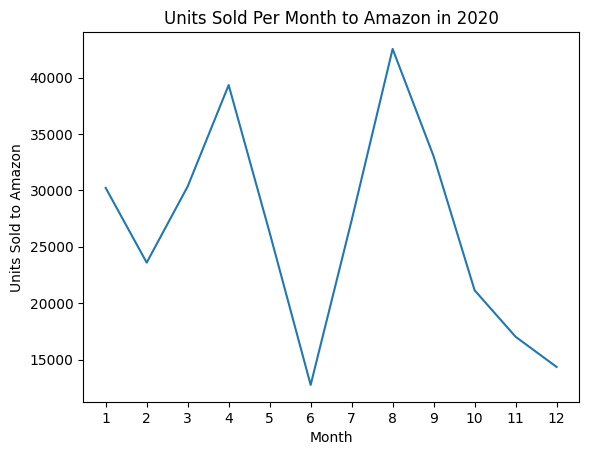

In [ ]:
# Create a line chart with the UNITS_SOLD per months in df_amazon_2020
x = df_amazon_2020.groupby(df_amazon_2020['INVOICE_DATE'].dt.month)['UNITS_SOLD'].sum().index
y = df_amazon_2020.groupby(df_amazon_2020['INVOICE_DATE'].dt.month)['UNITS_SOLD'].sum().values

plt.plot(x, y)
# Updating x-axis label and making sure all 12 months display on the x-axis
plt.xlabel('Month')
plt.xticks(np.arange(min(x), max(x) + 1, 1))
# Updating y-axis label
plt.ylabel('Units Sold to Amazon')
# Updating chart title
plt.title('Units Sold Per Month to Amazon in 2020')
plt.show()